# Chapter 4 - Classification  
Logistic Regression  
Linear Discriminant Analysis  
Quadratic Discriminant Analysis  
K-Nearest Neighbors

### 4.3.3 Making Predictions (Logistic Regression)

In [1]:
beta_0 <- -10.6513
beta_1 <- 0.0055
p_x <- 0.5 # probability of deafult
x <- (log(p_x / (1 - p_x)) - beta_0) / beta_1 # where x is the predictor, e.g. "balance"
x

[1] 1936.6

### 4.3.4 Multiple Logistic Regression

In [2]:
beta_0 <- -6.0
beta_1 <- 0.05
beta_2 <- 1.0
x1 <- 40.0 # hours studied
x2 <- 3.50 # undergrad GPA
exp_funct <- exp(beta_0 + beta_1 * x1 + beta_2 * x2)
p_A <- exp_funct / (1 + exp_funct)
p_A

[1] 0.3775407

In [3]:
p_A <- 0.50 # probability of getting an 'A'
x1 <- (log(p_A / (1 - p_A)) - beta_0 - beta_2 * x2) / beta_1
x1

[1] 50

### 4.6.3 Linear Discriminant Analysis

In [5]:
library(ISLR)

Stock market data, % of returns for the S&P 500 stock index from 2001 to 2005. Each records contains the today's percentage of returns plus the percentage of the previous 5 days (lag), the current direction of the market (up or down) and the volume of the exchanges (numbers of shares traded on the previous day in billions). A new dataset can be computed from the S&P500 historical data available from [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history).

In [6]:
names(Smarket) 

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [7]:
Smarket[1:4, 1:9]  # prints the first 4 records

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up


Print the correlation matrix between each pair of variables exept 'Direction' because it is not numeric. The only correlation is between 'Volume' and 'Year'

In [8]:
cor(Smarket[,-9]) 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


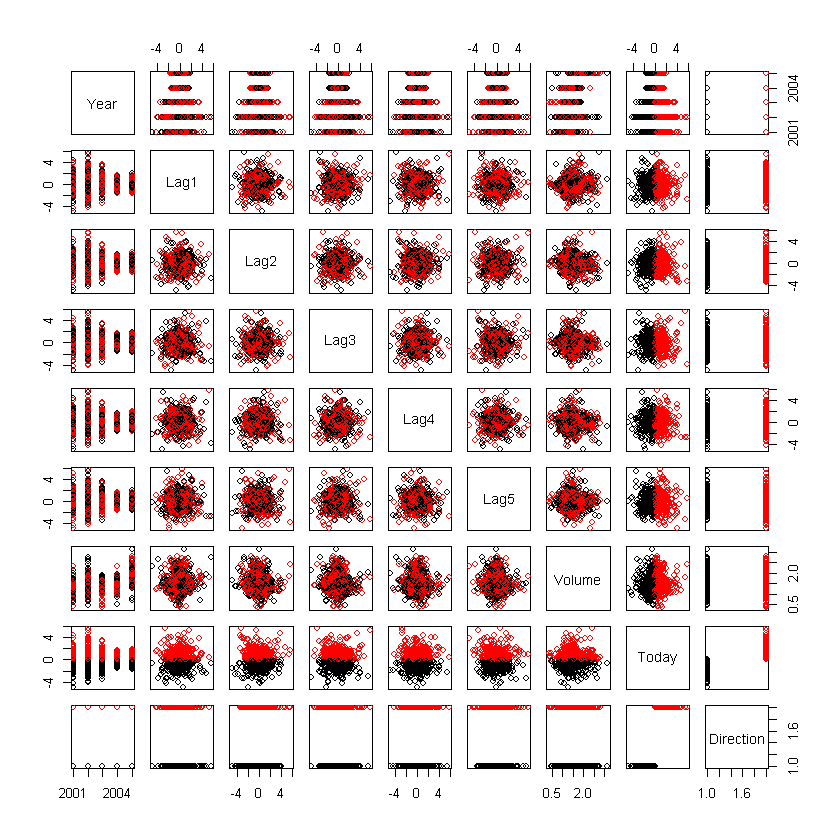

In [9]:
pairs(Smarket, col = Smarket$Direction)

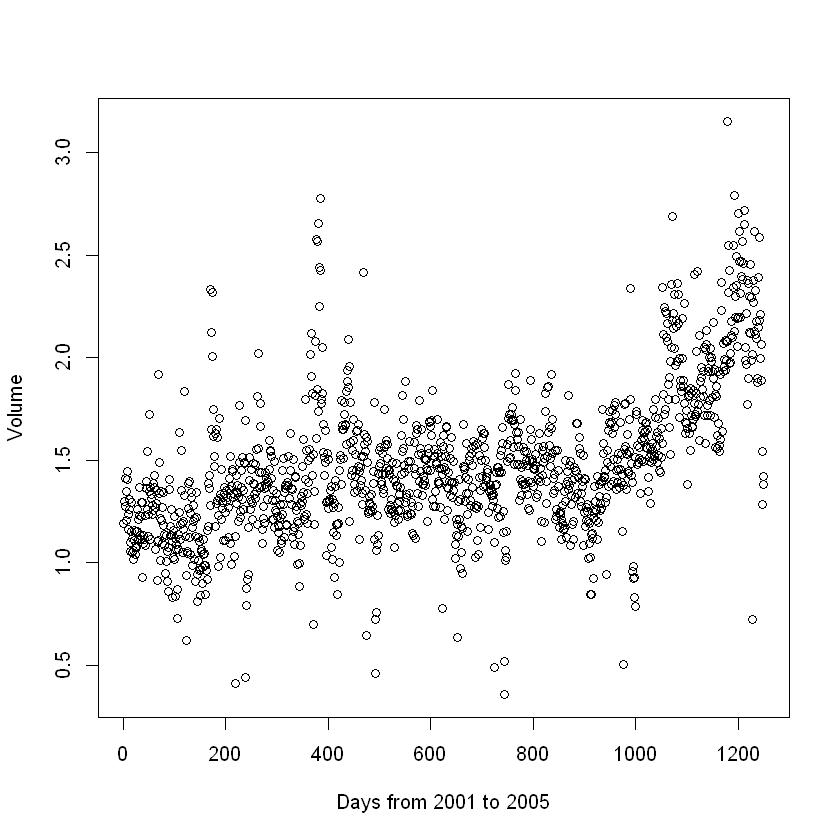

In [10]:
plot(Smarket$Volume, xlab = "Days from 2001 to 2005", ylab = "Volume")

### 4.6.2 Logistic Regression
We want to predict the direction of the S&P500 index, up or down, using multiple logistic regression.

In [11]:
attach(Smarket) # we can use the name of the variables without the prefix.
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


Now we compute the probabilities for 'Direction' using the linear regression model.

In [12]:
glm.probs <- predict(glm.fit, type = "response")
glm.probs[1:10] # first 10 probabilities of the S&P500 index going up

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [13]:
contrasts(Direction) # values of the dummy vartiable for 'Direction' created by R.

,Up
Down,0
Up,1


In [14]:
glm.pred <- rep("Down", 1250)
glm.pred[glm.probs > 0.5] = "Up"
glm.pred[1:10]

[1] "Up"   "Down" "Down" "Up"   "Up"   "Up"   "Down" "Up"   "Up"   "Down"

Confusion matrix. The diagonal elements indicate correct predictions, off-diagonals represents incorrect predictions. 

In [15]:
confusion <- table(glm.pred, Direction) # confusion matrix
confusion

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [16]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1]) # percentage of correct predictions is

[1] 0.5216

We want to train the linear regression model on a subset of the training dataset in order to have a test dataset.

In [17]:
Smarket.2005 <- Smarket[Smarket$Year == 2005, 1:9]
Direction.2005 <- Direction[Year == 2005]
dim(Smarket.2005)

[1] 252   9

We fit the linear regression model using the subset before 2005 and then we make the predictions for 2005.

In [18]:
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial, subset = Year < 2005)
glm.probs <- predict(glm.fit, Smarket.2005, type = "response")

In [19]:
glm.pred <- rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
confusion <- table(glm.pred, Direction.2005)
confusion

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

The percentage of correct predictions on the test data set is worse than on the training set, worse than guessing !.

In [20]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1])

[1] 0.4801587

We remove all the predictors but Lag1 and Lag 2 that have the lowest p-value so should be the best predictors available for Direction.

In [21]:
glm.fit <- glm(Direction ~ Lag1 + Lag2, data = Smarket, family = binomial, subset = Year < 2005)
glm.probs <- predict(glm.fit, Smarket.2005, type = "response")
glm.pred <- rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
confusion <- table(glm.pred, Direction.2005)
confusion

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [22]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1])

[1] 0.5595238

### 4.6.3 Linear Discriminant Analysis

We fit a linear discriminant analysis model for the S&P500 dataset to predict the direction using the two predictors Lag1 and Lag2 as in the last linear regression example. The model in based on the Bayes rule, assuming the likelihood function for each class to be Gaussian. A 3rd assumption is that the correlation matrix for each class is the same. We use the lda() function available in the MASS package. We train the model using the subset of the dataset before 2005. The model can be used to predict which of the two classes, Direction == "Up" or Direction == "Down" a day will be assigned to, using the S&P500 values in the two previous days. The model has two predictors and two classes.

In [24]:
library(MASS)
lda.fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

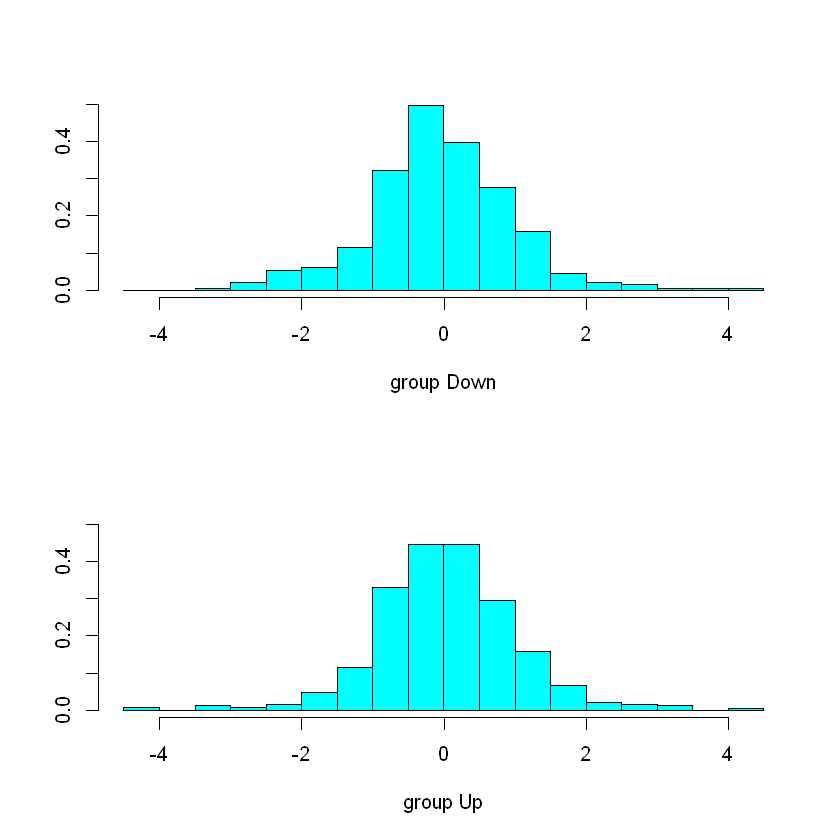

In [25]:
plot(lda.fit)

We use the model to predict the direction in 2005 and then compare the prediction with the test data for 2005. 

In [26]:
lda.pred <- predict(lda.fit, Smarket.2005)
confusion <- table(lda.pred$class, Direction.2005)
confusion

      Direction.2005
       Down  Up
  Down   35  35
  Up     76 106

In [27]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1])

[1] 0.5595238

### 4.6.4 Quadratic Discriminant Analysis
The quadratic discriminant analysis model is based on the same assumptions as the linear model but the correlation matrices for each class can be different. Another model, the naive Bayes assumes the simplifying constraint that the correlation matrices are diagonals.

In [28]:
qda.fit <- qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

We use the quadratic model to predict the direction in 2005 and then compare the prediction with the test data for 2005.

In [29]:
qda.pred <- predict(qda.fit, Smarket.2005)
confusion <- table(qda.pred$class, Direction.2005)
confusion

      Direction.2005
       Down  Up
  Down   30  20
  Up     81 121

We can see that the quadratic model predicts the correct direction 60 % of the times.

In [30]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1])

[1] 0.5992063

### 4.6.5 K-Nearest Neighbors
This model doesn't fit a function to be used for prediction. It computes the prediction by computing the distance of the input from the points in the dataset that belong to different classes. 

In [31]:
library(class)
train.X <- cbind(Lag1, Lag2)[Year < 2005,]
test.X <- cbind(Lag1, Lag2)[Year == 2005,]
train.Direction <- Direction[Year < 2005]

In [32]:
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Direction, k = 3)
confusion <- table(knn.pred, Direction.2005)
confusion

        Direction.2005
knn.pred Down Up
    Down   48 55
    Up     63 86

In [33]:
(confusion[1,1] + confusion[2,2]) / (confusion[1,1] + confusion[2,2] + confusion[1,2] + confusion[2,1])

[1] 0.531746

### 4.6.6 An Application to Caravan Insurance Data
We use the K-Nearest neighbors for another dataset, 'Caravan', which is part of the ISLR package. The dataset has 85 predictors and one predictive variable, 'Purchase' that can get one of two values, 'Yes' or 'No'. There are 5822 records.

In [34]:
attach(Caravan)
summary(Purchase)

No  Yes 
5474  348

We standardize all the variables but 'Purchase' so that the mean value for each variable is zero and the standard deviation is 1.0.

In [35]:
standardized.X <- scale(Caravan[, -86])

We now split the Caravan dataset into a test dataset of 1000 records and a training set with the remaining 4822 records.

In [36]:
test <- 1:1000
test.X <- standardized.X[test,]
train.X <- standardized.X[-test,]
test.Y <- Purchase[test]
train.Y <- Purchase[-test]

In [41]:
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Y, k = 1)
confusion <- table(knn.pred, test.Y)
confusion

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

The percentage of correct predictions looks good, almost 90 %, but since only 6 % of the records are purchases it means that we can predict only 5 % of the purchases by random guess.

In [45]:
mean(test.Y == knn.pred) * mean(test.Y == 'Yes')

[1] 0.052038

The fraction of correct predictions using KNN instead of random guess in better, 11.7 % instead of 5 %, and it improves with k = 3 and k = 5.

In [44]:
confusion[2,2] / (confusion[2,1] + confusion[2,2])

[1] 0.1168831